## 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피쳐 : Length, Height, Width
- 타겟 : Weight

- [조건]
    - 특성 추가 => degree = 5로 설정
    - 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [1]:
import pandas as pd

data = '../data/perch3.csv'

perchDF = pd.read_csv(data)
perchDF


,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


### [2] 데이터 피쳐 및 타겟 분리

In [5]:
featureDF = perchDF[perchDF.columns[1:]]
featureDF

,Length,Height,Width
0,8.4,2.1120,1.4080
1,13.7,3.5280,1.9992
2,15.0,3.8240,2.4320
3,16.2,4.5924,2.6316
4,17.4,4.5880,2.9415
5,18.0,5.2224,3.3216
6,18.7,5.1992,3.1234
7,19.0,5.6358,3.0502
8,19.6,5.1376,3.0368
9,20.0,5.0820,2.7720


In [14]:
targetDF = perchDF.Weight
targetDF


0        5.9
1       32.0
2       40.0
3       51.5
4       70.0
5      100.0
6       78.0
7       80.0
8       85.0
9       85.0
10     110.0
11     115.0
12     125.0
13     130.0
14     120.0
15     120.0
16     130.0
17     135.0
18     110.0
19     130.0
20     150.0
21     145.0
22     150.0
23     170.0
24     225.0
25     145.0
26     188.0
27     180.0
28     197.0
29     218.0
30     300.0
31     260.0
32     265.0
33     250.0
34     250.0
35     300.0
36     320.0
37     514.0
38     556.0
39     840.0
40     685.0
41     700.0
42     700.0
43     690.0
44     900.0
45     650.0
46     820.0
47     850.0
48     900.0
49    1015.0
50     820.0
51    1100.0
52    1000.0
53    1100.0
54    1000.0
55    1000.0
Name: Weight, dtype: float64

In [24]:
featureDF.shape, targetDF.shape, type(targetDF)


((56, 3), (56,), pandas.core.series.Series)

#### [2-2] 데이터 분포 확인

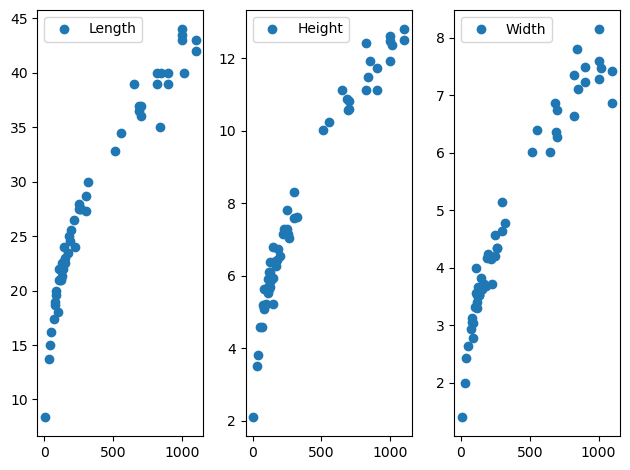

In [34]:
import matplotlib.pyplot as plt

# Feature & Target 관계
r = 1
for i in range(len(featureDF.columns)):
    plt.subplot(1,3,r)
    plt.plot(targetDF, featureDF[featureDF.columns[i]], 'o', label = featureDF.columns[i])
    plt.legend()
    r+=1
plt.tight_layout()
plt.show()

# 직선의 형태는 아니지만 곡선이 양의 방향/비례하는 분포 확인

### [3] 데이터 가공 <hr>
- 특성 추가
- 특성 스케일링

#### [3-1] 특성 추가

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(featureDF)
poly_feature = poly.transform(featureDF)
poly_feature

print(f'특성추가 => poly_feature : {poly_feature.shape}\n원래 피쳐 => {poly.feature_names_in_}\n추가된 피쳐 => {poly.get_feature_names_out()}')

특성추가 => poly_feature : (56, 55)
원래 피쳐 => ['Length' 'Height' 'Width']
추가된 피쳐 => ['Length' 'Height' 'Width' 'Length^2' 'Length Height' 'Length Width'
 'Height^2' 'Height Width' 'Width^2' 'Length^3' 'Length^2 Height'
 'Length^2 Width' 'Length Height^2' 'Length Height Width' 'Length Width^2'
 'Height^3' 'Height^2 Width' 'Height Width^2' 'Width^3' 'Length^4'
 'Length^3 Height' 'Length^3 Width' 'Length^2 Height^2'
 'Length^2 Height Width' 'Length^2 Width^2' 'Length Height^3'
 'Length Height^2 Width' 'Length Height Width^2' 'Length Width^3'
 'Height^4' 'Height^3 Width' 'Height^2 Width^2' 'Height Width^3' 'Width^4'
 'Length^5' 'Length^4 Height' 'Length^4 Width' 'Length^3 Height^2'
 'Length^3 Height Width' 'Length^3 Width^2' 'Length^2 Height^3'
 'Length^2 Height^2 Width' 'Length^2 Height Width^2' 'Length^2 Width^3'
 'Length Height^4' 'Length Height^3 Width' 'Length Height^2 Width^2'
 'Length Height Width^3' 'Length Width^4' 'Height^5' 'Height^4 Width'
 'Height^3 Width^2' 'Height^2 Width^3' 'Hei

#### [3-2] 피쳐 스케일링
- 훈련용 & 테스트용 분리

In [50]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(poly_feature,
                                                    targetDF,
                                                    random_state=5)

In [51]:
print(f'Feature => {X_train.shape}, {y_train.shape} Test => {x_test.shape}, {y_test.shape}')

Feature => (42, 55), (42,) Test => (14, 55), (14,)


- 스케일링 진행

In [52]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [53]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(x_test)

### [4] 학습진행 => 회귀

In [54]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [55]:
train_score = lr_model.score(scaled_X_train,y_train)
test_score = lr_model.score(scaled_X_test, y_test)

print(f'TRAIN SCORE => {train_score} TEST SCORE => {test_score}')

TRAIN SCORE => 1.0 TEST SCORE => -38.767867489561255


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결 <hr>
- Ridge : 모든 피쳐에 가중치를 0에 가깝게 조절
- Lasso : 특정 피쳐의 가중치를 0으로 해서 차원 축소 부여

- [규제 1] Ridge

In [64]:
from sklearn.linear_model import Ridge

In [65]:
ridge_model = Ridge(max_iter=100)
ridge_model.fit(scaled_X_train, y_train)

Ridge(max_iter=100)

In [96]:
train_score = ridge_model.score(scaled_X_train,y_train)
test_score = ridge_model.score(scaled_X_test, y_test)

print(f'[Ridge] TRAIN SCORE => {train_score} TEST SCORE => {test_score}')

[Ridge] TRAIN SCORE => 0.982383820995442 TEST SCORE => 0.9860777054753922


In [97]:
# 모델 파라미터 확인
print(f'ridge_model.n_iter_ => {ridge_model.n_iter_}\nridge_model.coef_ => {ridge_model.coef_}\nridge_model =>{ridge_model.intercept_}')

ridge_model.n_iter_ => None
ridge_model.coef_ => [11.58560914 11.16871618 10.39672634 10.43553996 10.30812209  9.39595309
 10.1819614   9.31995247  8.55296559  8.79731612  8.80333147  7.73056483
  8.82007477  7.77411194  6.85695994  8.84194644  7.8302827   6.95449212
  6.24012537  6.99048022  7.09000787  5.85098435  7.20258957  5.97647316
  4.89330485  7.32240759  6.11792627  5.06171886  4.18089483  7.44369106
  6.26958109  5.24897376  4.4085729   3.76301887  5.16108446  5.33263331
  3.9322057   5.51815866  4.11856325  2.86998652  5.71270869  4.32284579
  3.08804369  2.03691794  5.91116405  4.54039926  3.32875596  2.30556236
  1.48873436  6.1083241   4.7662634   3.5874804   2.6016167   1.82638393
  1.26751988]
ridge_model =>365.6404761904762


In [98]:
# ====> 최적의 규제 강도 설정 값 찾기
alphas=[0.1, 1.0, 10., 20., 30.]
ridge_score = [[],[]]

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_X_train, y_train)
    train_score = ridge_model.score(scaled_X_train,y_train)
    test_score = ridge_model.score(scaled_X_test, y_test)
    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)
    


In [99]:
# 테스트 점수가 가장 높은 알파
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]
best_alpha

1.0

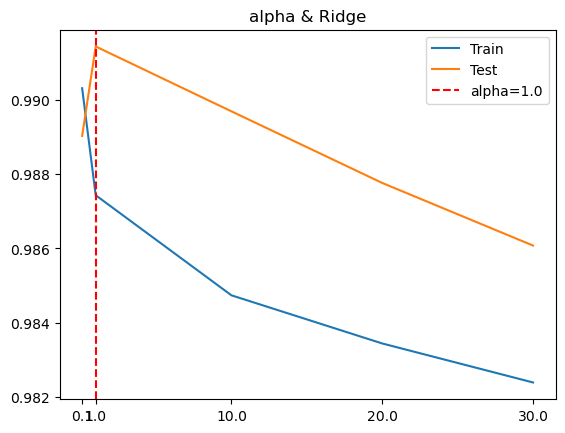

In [92]:
# 학습 및 테스트 점수 기반 시각화
import matplotlib.pyplot as plt

plt.plot(alphas, ridge_score[0], label='Train')
plt.plot(alphas, ridge_score[1], label='Test')
plt.title('alpha & Ridge')
plt.axvline(best_alpha, linestyle='--', color='red', label = f'alpha={best_alpha}')
plt.xticks(alphas)
plt.legend()
plt.show()

- [규제 2] Lasso

In [93]:
from sklearn.linear_model import Lasso

In [110]:
lasso_model = Lasso(max_iter=100)
lasso_model.fit(scaled_X_train, y_train)
train_score = lasso_model.score(scaled_X_train, y_train)
test_score = lasso_model.score(scaled_X_test, y_test)

print(f'[Lasso] TRAIN SCORE => {train_score} TEST SCORE => {test_score}')
# 모델 파라미터 확인
print(
    f'lasso_model.n_iter_ => {lasso_model.n_iter_}\nlasso_model.coef_ => {lasso_model.coef_}\nlasso_model =>{lasso_model.intercept_}')
# ====> 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1.0, 10., 20., 30.]
lasso_score = [[], []]

for a in alphas:
    lasso_model = Lasso(alpha=a, max_iter=100000)
    lasso_model.fit(scaled_X_train, y_train)
    train_score = lasso_model.score(scaled_X_train, y_train)
    test_score = lasso_model.score(scaled_X_test, y_test)
    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)

# 테스트 점수가 가장 높은 알파
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]
best_alpha
# 학습 및 테스트 점수 기반 시각화
import matplotlib.pyplot as plt

plt.plot(alphas, lasso_score[0], label='Train')
plt.plot(alphas, lasso_score[1], label='Test')
plt.title('alpha & Lasso')
plt.axvline(best_alpha, linestyle='--', color='red', label=f'alpha={best_alpha}')
plt.xticks(alphas)
plt.legend()
plt.show()

[Lasso] TRAIN SCORE => 0.9861019685826385 TEST SCORE => 0.9913772335015756
lasso_model.n_iter_ => 100
lasso_model.coef_ => [-0.         -0.          0.         58.59774722 32.61232745 20.42274409
 11.30560374 20.4682632  31.79772445  6.21193293 17.63899727  0.
 22.34229882  0.          3.2787791  18.82943604  0.          5.40998649
 20.00403592  1.89374719  0.          0.          2.61707595  0.
  0.         17.6798917   0.          0.          0.         17.49291671
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          2.01079301  0.
  0.          0.         15.60001999  0.          0.          0.
 -0.         15.49442774  0.          0.          0.          0.
  0.        ]
lasso_model =>365.6404761904762


/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.058e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


TypeError: 'float' object cannot be interpreted as an integer

# 라1쏘0, 릿2지

과대적합 확인 하기
- Dataset이 너무 적을 때 => Data 증폭 필요
- 피쳐가 너무 많을 때